# Name :- Rishabh Sharma
# Registration Number :- 20MAI0082

In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def processImage(image):
    image = cv2.imread(image) 
    image = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2GRAY) 
    return image

In [3]:
def convolve2D(image, kernel, padding=0, strides=1):
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        print(imagePadded)
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 2. 0. 0.]
 ...
 [0. 0. 2. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


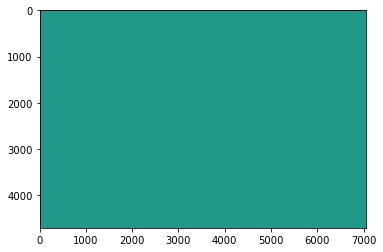

In [4]:
if __name__ == '__main__':
    # Grayscale Image
    image = processImage('113629_original_7042x4699.jpg')

    # Edge Detection Kernel
    kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

    output = convolve2D(image, kernel, padding=2)
    plt.imshow(output)
    plt.show()

# Taking stride as 2 and kernel size as 5*5

In [5]:
stride=2
filter_size=5

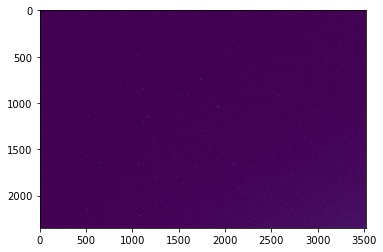

In [6]:
kernel = np.array([[1, 1, 1,1,1], [1, 1, 1,1,1], [1, 1, 1,1,1],[1, 1, 1,1,1], [1, 1, 1,1,1]])
# Convolve and Save Output
output2 = convolve2D(image, kernel,strides=2)
plt.imshow(output2)
plt.show()

In [7]:
output2

array([[  50.,    0.,   50., ...,   93.,    0.,   98.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [  50.,    0.,   51., ...,   87.,    0.,   92.],
       ...,
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [  50.,    0.,   50., ..., 1059.,    0., 1115.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.]])

# Taking stride as 1 but making an image padded with 0 padding

In [8]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
import cv2
from matplotlib import pyplot as plt

In [9]:
def processImage(image):
    
    image = cv2.imread(image) 
    image = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2GRAY) 
    return image

In [10]:
def convolve2D(image, kernel, padding=0, strides=1):
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        print(imagePadded)
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output

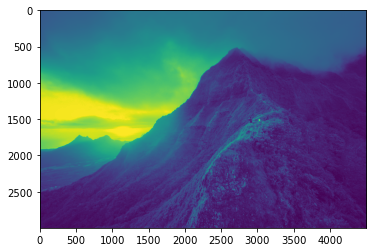

In [11]:
image = processImage('peter-vanosdall-ktpyjH2h9xs-unsplash.jpg')
kernel = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])
output3 = convolve2D(image, kernel, padding=0)
plt.imshow(output3)

In [12]:
output3

array([[630., 630., 630., ..., 684., 684., 684.],
       [630., 630., 630., ..., 682., 684., 684.],
       [633., 633., 633., ..., 682., 684., 684.],
       ...,
       [150., 140., 130., ...,  80.,  83.,  85.],
       [143., 135., 127., ...,  72.,  76.,  82.],
       [134., 130., 126., ...,  59.,  64.,  71.]])

# Calculating metrics i.e. entropy between original image and filtered image

In [13]:
import skimage.measure    
entropy_original_image = skimage.measure.shannon_entropy(image)

In [14]:
print(entropy_original_image)

7.470314626942694


In [15]:
import skimage.measure    
entropy_for_1_stride = skimage.measure.shannon_entropy(output)

In [16]:
print(entropy_for_1_stride)

5.679802588028154


In [17]:
import skimage.measure    
entropy_for_2_stride = skimage.measure.shannon_entropy(output2)

In [18]:
print(entropy_for_2_stride)

2.819561491155553


In [19]:
import skimage.measure    
entropy_for_0_padding = skimage.measure.shannon_entropy(output3)

In [20]:
print(entropy_for_0_padding)

10.51879444649381
